#**Load Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

In [ ]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import data
df_1 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/employee_survey_data.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/general_data.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/manager_survey_data.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/in_time.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/DATA SCIENTIST/Week 12/out_time.csv')

In [ ]:
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df_1.sample(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
2570,2571,3.0,4.0,3.0
832,833,3.0,1.0,3.0
3400,3401,4.0,1.0,3.0
1167,1168,2.0,4.0,3.0
218,219,4.0,2.0,3.0


In [ ]:
df_2.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1150,23,No,Travel_Rarely,Research & Development,7,3,Life Sciences,1,1151,Male,...,1.0,Y,11,8,1,5.0,2,5,1,4
3880,33,No,Non-Travel,Research & Development,18,2,Medical,1,3881,Female,...,1.0,Y,13,8,0,7.0,6,6,1,2
2246,45,No,Travel_Rarely,Sales,10,2,Marketing,1,2247,Male,...,2.0,Y,14,8,0,24.0,1,7,0,7
1778,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,1779,Male,...,4.0,Y,13,8,1,8.0,2,5,1,3
1409,42,No,Non-Travel,Research & Development,1,1,Technical Degree,1,1410,Male,...,2.0,Y,11,8,1,11.0,2,5,0,2


In [ ]:
df_3.sample(5)

,EmployeeID,JobInvolvement,PerformanceRating
3838,3839,3,3
3529,3530,3,3
1266,1267,3,4
926,927,3,3
1323,1324,3,3


In [ ]:
df_4.sample(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
977,978,NaN,2015-01-02 10:34:58,2015-01-05 10:03:23,2015-01-06 10:20:07,2015-01-07 09:58:34,NaN,2015-01-09 10:16:47,2015-01-12 09:52:41,2015-01-13 10:07:02,...,2015-12-18 09:55:04,2015-12-21 09:44:10,NaN,2015-12-23 10:02:51,2015-12-24 10:15:54,NaN,2015-12-28 09:54:34,2015-12-29 10:34:19,2015-12-30 10:19:16,2015-12-31 10:10:40
138,139,NaN,2015-01-02 10:10:35,2015-01-05 09:41:03,2015-01-06 10:34:38,2015-01-07 10:15:12,2015-01-08 10:04:32,2015-01-09 09:49:03,2015-01-12 09:59:22,2015-01-13 10:12:07,...,2015-12-18 09:55:58,2015-12-21 09:26:11,2015-12-22 10:32:42,2015-12-23 10:08:01,2015-12-24 10:09:05,NaN,2015-12-28 09:57:14,2015-12-29 10:20:55,2015-12-30 10:02:26,2015-12-31 10:11:52
3732,3733,NaN,2015-01-02 09:56:21,2015-01-05 09:42:00,2015-01-06 09:50:51,2015-01-07 10:49:25,2015-01-08 09:53:45,2015-01-09 10:07:44,2015-01-12 09:53:04,2015-01-13 09:34:33,...,2015-12-18 10:43:07,2015-12-21 10:12:35,2015-12-22 10:10:31,2015-12-23 09:31:06,2015-12-24 09:44:11,NaN,2015-12-28 10:33:40,2015-12-29 10:02:08,2015-12-30 10:00:51,2015-12-31 10:29:51
3784,3785,NaN,2015-01-02 09:33:38,2015-01-05 09:59:25,2015-01-06 09:55:06,2015-01-07 09:49:24,2015-01-08 09:31:52,2015-01-09 09:49:45,2015-01-12 09:39:01,2015-01-13 09:53:41,...,2015-12-18 10:10:52,2015-12-21 09:59:16,2015-12-22 10:11:57,2015-12-23 10:11:50,2015-12-24 10:13:05,NaN,2015-12-28 09:34:14,2015-12-29 10:01:24,2015-12-30 10:22:26,2015-12-31 09:54:35
2058,2059,NaN,2015-01-02 09:50:47,2015-01-05 10:10:39,2015-01-06 10:11:53,2015-01-07 10:34:43,2015-01-08 10:02:37,2015-01-09 10:08:31,2015-01-12 10:02:27,2015-01-13 09:36:55,...,2015-12-18 10:20:49,2015-12-21 10:15:38,2015-12-22 10:04:38,2015-12-23 10:02:12,2015-12-24 10:19:01,NaN,2015-12-28 10:13:30,2015-12-29 09:49:50,2015-12-30 10:10:37,2015-12-31 09:39:37


In [ ]:
df_5.sample(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
459,460,NaN,2015-01-02 17:47:07,2015-01-05 17:15:58,2015-01-06 17:15:36,2015-01-07 16:56:31,2015-01-08 17:26:02,2015-01-09 17:06:42,2015-01-12 17:28:58,2015-01-13 16:19:25,...,2015-12-18 16:40:48,2015-12-21 17:22:00,2015-12-22 16:49:32,2015-12-23 17:04:47,2015-12-24 17:01:37,NaN,2015-12-28 16:45:06,2015-12-29 16:56:55,2015-12-30 17:05:06,2015-12-31 17:18:18
2209,2210,NaN,2015-01-02 19:36:32,2015-01-05 19:38:40,2015-01-06 19:37:09,2015-01-07 19:47:13,2015-01-08 19:33:21,2015-01-09 20:41:41,2015-01-12 19:24:53,2015-01-13 20:15:18,...,2015-12-18 20:16:25,2015-12-21 20:39:47,2015-12-22 20:37:31,2015-12-23 19:47:18,2015-12-24 19:48:35,NaN,2015-12-28 20:23:14,2015-12-29 19:33:37,2015-12-30 19:53:40,2015-12-31 20:29:02
3487,3488,NaN,2015-01-02 16:49:49,2015-01-05 15:47:19,2015-01-06 15:50:59,2015-01-07 15:33:20,2015-01-08 15:39:25,2015-01-09 15:45:31,2015-01-12 16:25:10,2015-01-13 15:40:17,...,2015-12-18 15:55:35,2015-12-21 15:32:49,2015-12-22 15:40:03,2015-12-23 16:14:56,2015-12-24 16:03:19,NaN,2015-12-28 15:54:35,2015-12-29 15:34:17,2015-12-30 16:10:23,2015-12-31 16:19:40
4080,4081,NaN,2015-01-02 17:58:03,2015-01-05 18:37:37,2015-01-06 17:10:40,2015-01-07 17:10:00,2015-01-08 17:52:08,2015-01-09 18:28:43,2015-01-12 18:07:05,2015-01-13 18:09:24,...,2015-12-18 17:57:13,2015-12-21 18:19:19,2015-12-22 17:16:41,2015-12-23 16:39:37,2015-12-24 18:18:23,NaN,2015-12-28 18:17:53,2015-12-29 18:23:13,2015-12-30 18:05:37,2015-12-31 17:53:32
3874,3875,NaN,2015-01-02 19:34:09,2015-01-05 19:51:40,2015-01-06 19:27:39,2015-01-07 20:22:08,2015-01-08 19:48:37,2015-01-09 19:44:48,2015-01-12 19:19:39,2015-01-13 19:52:20,...,2015-12-18 19:34:13,2015-12-21 18:49:31,NaN,NaN,2015-12-24 19:39:42,NaN,2015-12-28 19:50:36,2015-12-29 19:00:25,2015-12-30 19:39:16,2015-12-31 20:17:08


In [ ]:
#Menggabungkan (merge) df_1, df_2, dan df_3
df_merge = pd.merge(df_1, df_2, on = 'EmployeeID')
df_merge = pd.merge(df_merge, df_3, on = 'EmployeeID')
df_merge.sample(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
3939,3940,1.0,3.0,3.0,31,Yes,Travel_Rarely,Human Resources,9,4,...,14,8,2,10.0,2,1,0,0,3,3
1032,1033,4.0,1.0,2.0,34,Yes,Travel_Frequently,Research & Development,2,1,...,23,8,2,11.0,2,7,0,7,4,4
3195,3196,4.0,3.0,3.0,20,Yes,Travel_Rarely,Research & Development,1,3,...,12,8,3,1.0,2,1,1,1,2,3
518,519,4.0,4.0,3.0,20,Yes,Travel_Frequently,Sales,8,3,...,20,8,0,2.0,3,2,0,2,2,4
2179,2180,2.0,2.0,3.0,40,No,Travel_Rarely,Research & Development,14,4,...,22,8,0,7.0,2,4,0,3,1,4


In [ ]:
df_merge.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

#**Data Pre-Processing**

##Handle Missing Values

In [ ]:
data = df_merge.copy()

In [ ]:
missing_values_before = data.isna().sum().sort_values(ascending=False)
missing_values_before

,0
WorkLifeBalance,38
EnvironmentSatisfaction,25
JobSatisfaction,20
NumCompaniesWorked,19
TotalWorkingYears,9
EmployeeID,0
MonthlyIncome,0
JobInvolvement,0
YearsWithCurrManager,0
YearsSinceLastPromotion,0


In [ ]:
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].fillna(data['EnvironmentSatisfaction'].mode()[0])
data['JobSatisfaction'] = data['JobSatisfaction'].fillna(data['JobSatisfaction'].mode()[0])
data['WorkLifeBalance'] = data['WorkLifeBalance'].fillna(data['WorkLifeBalance'].mode()[0])
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].median())
data['TotalWorkingYears'] = data['TotalWorkingYears'].fillna(data['TotalWorkingYears'].median())

In [ ]:
missing_values_after = data.isna().sum()
missing_values_after = missing_values_after[missing_values_before.index]
missing_values_after

,0
WorkLifeBalance,0
EnvironmentSatisfaction,0
JobSatisfaction,0
NumCompaniesWorked,0
TotalWorkingYears,0
EmployeeID,0
MonthlyIncome,0
JobInvolvement,0
YearsWithCurrManager,0
YearsSinceLastPromotion,0


##Duplicated Data

In [ ]:
data.duplicated().any()

False

In [ ]:
print('Jumlah data duplikat:', data.duplicated().sum())

Jumlah data duplikat: 0


##Outliers

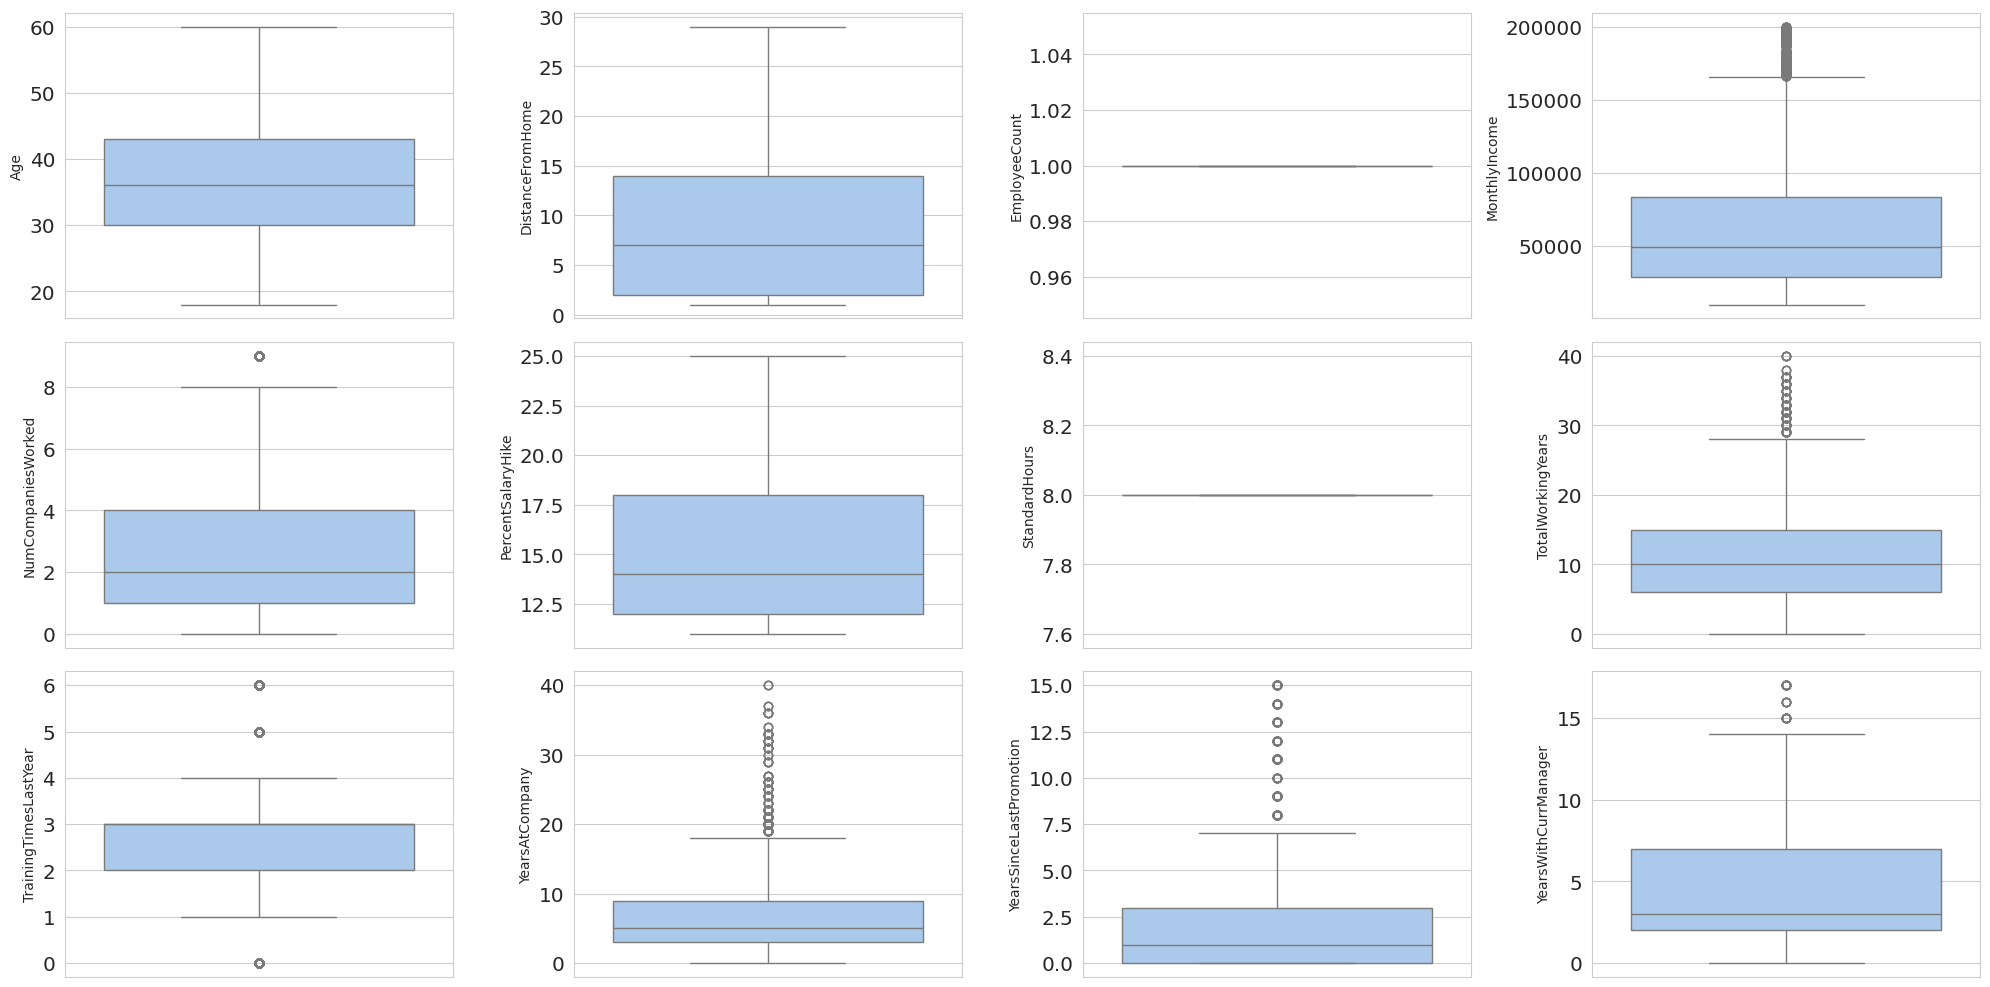

In [ ]:
#Mengabaikan peringatan FutureWarning
warnings.filterwarnings('ignore', category = FutureWarning)

#Mengatur gaya seaborn
sns.set_style('whitegrid')

#Daftar kolom numerik yang akan divisualisasikan
numericals = ['Age', 'DistanceFromHome', 'EmployeeCount', 'MonthlyIncome', 'NumCompaniesWorked',
              'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
              'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#Melihat distribusi masing-masing kolom numerik
plt.figure(figsize = (20, 10))
for i in range(len(numericals)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data[numericals[i]], palette = 'pastel', orient = 'v') #Boxplot
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
#Menghitung persentase outliers di setiap kolom numerik
numericals = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
              'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
              'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

outlier_data = []

for col in numericals:

  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  low_limit = Q1 - 1.5 * IQR
  high_limit = Q3 + 1.5 * IQR

  outliers = data[(data[col] < low_limit) | (data[col] > high_limit)].shape[0]
  outlier_percentage = (outliers / data.shape[0]) * 100
  outlier_data.append({'Kolom': col, 'Persentase Outliers': outlier_percentage})

outlier_df = pd.DataFrame(outlier_data)
outlier_df

,Kolom,Persentase Outliers
0,Age,0.000000
1,DistanceFromHome,0.000000
2,MonthlyIncome,7.755102
3,NumCompaniesWorked,3.537415
4,PercentSalaryHike,0.000000
5,TotalWorkingYears,4.285714
6,TrainingTimesLastYear,16.190476
7,YearsAtCompany,7.074830
8,YearsSinceLastPromotion,7.278912
9,YearsWithCurrManager,0.952381


Karena persentase outliers pada kolom **NumCompaniesWorked**, **TotalWorkingYears** dan **YearsWithCurrManager** < 5%, maka data outliers akan di-drop.

In [ ]:
column_to_clean = ['NumCompaniesWorked', 'TotalWorkingYears', 'YearsWithCurrManager']

for col in column_to_clean:

  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  low_limit = Q1 - 1.5 * IQR
  high_limit = Q3 + 1.5 * IQR

  data = data[(data[col] >= low_limit) & (data[col] <= high_limit)]

##Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Kolom kategorikal yang akan di OneHot Encoding dan Label Encoding
columns_onehot = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18']
columns_label = ['Gender', 'Attrition']

for col in columns_onehot:
  df_onehot = pd.get_dummies(data[col], prefix = col)
  df_onehot = df_onehot.astype(int)
  data = pd.concat([data, df_onehot], axis = 1)
  data.drop(columns = col, inplace = True)

for col in columns_label:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])

In [ ]:
columns_to_drop = ['EmployeeID', 'EmployeeCount', 'StandardHours', 'Over18_Y']

#Menghapus kolom dari data
data = data.drop(columns = columns_to_drop, axis = 1)

##Feature Extraction

In [ ]:
#Membuat feature 'PromotionGap' dan 'AverageYearsPerCompany' ke dalam data set
data['PromotionGap'] = data['YearsAtCompany'] - data['YearsSinceLastPromotion']
data['AverageYearsPerCompany'] = data['TotalWorkingYears'] / (data['NumCompaniesWorked'].replace(0, 1))

##Feature Transformation

Sebelum feature transformation, terlebih dahulu dilakukan split antara data test dan data train. Fit scaling dengan standard scaler hanya dilakukan pada data train, kemudian transformasi data test menggunakan parameter scaling yang telah dipelajari dari data train.

In [ ]:
#Split data train dan test
X = data.drop(columns = ['Attrition'])
y = data['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##Class Imbalance

In [ ]:
print(pd.Series(y_train).value_counts())

Attrition
0    2363
1     465
Name: count, dtype: int64


Terjadi class imbalance dengan rasio dari kelas No terhadap kelas Yes adalah sekitar 5.17.
Untuk mencegah kebocoran data (data leakage), akan dilakukan SMOTE terhadap data train saja, tidak pada data test.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Ukuran data sebelum SMOTE:', f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print('Ukuran data setelah SMOTE:', f'X_train_resampled: {X_train_resampled.shape}, y_train_resampled: {y_train_resampled.shape}')

Ukuran data sebelum SMOTE: X_train: (2828, 45), y_train: (2828,)
Ukuran data setelah SMOTE: X_train_resampled: (4726, 45), y_train_resampled: (4726,)


In [ ]:
#Melihat jumlah kelas setelah di-SMOTE
print(pd.Series(y_train_resampled).value_counts())

Attrition
0    2363
1    2363
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_resampled)
X_test_scaled = ss.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_resampled.columns, index = X_train_resampled.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

print("Scaled Training Data:\n", X_train_scaled.head())
print("\nScaled Test Data:\n", X_test_scaled.head())

Scaled Training Data:
    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance       Age  \
0                -0.542890         1.236486         0.329888  0.148231   
1                -0.542890        -1.472710        -1.101094  0.030056   
2                -1.439776         1.236486         0.329888  0.502756   
3                 1.250883         0.333421        -1.101094 -0.442643   
4                -1.439776        -1.472710         0.329888  1.211805   

   DistanceFromHome  Education    Gender  JobLevel  MonthlyIncome  \
0         -1.059919   0.078114 -1.096466  0.000744      -0.898019   
1          0.796019   0.078114  0.912021  0.937727       0.026179   
2         -1.059919   0.078114  0.912021  0.000744       0.071039   
3         -1.059919  -0.934441 -1.096466  0.000744      -0.791749   
4          1.326287   1.090670  0.912021  0.937727      -0.650637   

   NumCompaniesWorked  ...  JobRole_Manufacturing Director  \
0           -0.699831  ...                       -0.280

In [ ]:
X_train_scaled.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionGap,AverageYearsPerCompany
0,-0.542890,1.236486,0.329888,0.148231,-1.059919,0.078114,-1.096466,0.000744,-0.898019,-0.699831,...,-0.280623,-0.219906,-0.43018,-0.456832,-0.204663,-0.424988,-0.721521,1.375605,0.838136,0.654152
1,-0.542890,-1.472710,-1.101094,0.030056,0.796019,0.078114,0.912021,0.937727,0.026179,-0.699831,...,3.563503,-0.219906,-0.43018,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,1.099971,0.879637
2,-1.439776,1.236486,0.329888,0.502756,-1.059919,0.078114,0.912021,0.000744,0.071039,2.115800,...,-0.280623,-0.219906,-0.43018,-0.456832,-0.204663,2.353009,-0.721521,-0.726953,0.838136,-0.473270
3,1.250883,0.333421,-1.101094,-0.442643,-1.059919,-0.934441,-1.096466,0.000744,-0.791749,-0.699831,...,-0.280623,-0.219906,-0.43018,2.188988,-0.204663,-0.424988,1.385962,-0.726953,1.361805,0.879637
4,-1.439776,-1.472710,0.329888,1.211805,1.326287,1.090670,0.912021,0.937727,-0.650637,-0.230559,...,-0.280623,4.547406,-0.43018,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,-0.732871,-0.586013


In [ ]:
X_test_scaled.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionGap,AverageYearsPerCompany
1261,1.250883,1.236486,0.329888,0.030056,-0.131950,1.090670,-1.096466,0.937727,-0.564184,-0.699831,...,-0.280623,-0.219906,2.324606,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,-0.732871,-0.924239
162,-0.542890,0.333421,0.329888,-0.678993,-0.131950,0.078114,-1.096466,0.937727,2.831437,-0.699831,...,3.563503,-0.219906,-0.430180,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,1.623640,1.105121
2218,-1.439776,-1.472710,0.329888,1.684504,-0.397084,2.103225,-1.096466,0.000744,-0.889962,0.238713,...,-0.280623,-0.219906,-0.430180,-0.456832,-0.204663,-0.424988,-0.721521,1.375605,-0.209202,0.353506
3479,-1.439776,0.333421,-1.101094,-1.033517,-0.131950,-0.934441,0.912021,0.000744,0.362845,-0.699831,...,-0.280623,-0.219906,-0.430180,2.188988,-0.204663,2.353009,-0.721521,-0.726953,-0.732871,-0.924239
4344,-0.542890,0.333421,0.329888,0.030056,-0.927352,1.090670,-1.096466,0.000744,0.969976,0.238713,...,-0.280623,4.547406,-0.430180,-0.456832,-0.204663,-0.424988,1.385962,-0.726953,-0.732871,-0.548432


In [ ]:
X_train.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'Gender', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Dir

##Feature Selection

- Kolom EmployeeID di-drop karena hanya sebagai identify
- Kolom EmployeeCount, StandardHours dan Over18 dapat di-drop karena tidak memiliki variabilitas